# **Importing DataSet**:


## **Kaggle API Usage:** **( Optional if data csv not available)**






In [ ]:
#Linking kaggle importing dataset:--
!pip install kaggle
!mkdir ~/.kaggle


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#kaggle api token generated from account settings uploaded to the instance home folder.
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list --user stefanoleone992
!kaggle datasets download -d stefanoleone992/fifa-22-complete-player-dataset  
!ls -la

ref                                                                title                                               size  lastUpdated          downloadCount  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
stefanoleone992/fifa-22-complete-player-dataset                    FIFA 22 complete player dataset                    109MB  2021-11-01 22:25:02           3106  
stefanoleone992/fifa-20-complete-player-dataset                    FIFA 20 complete player dataset                     15MB  2019-09-26 20:19:33          25775  
stefanoleone992/fifa-21-complete-player-dataset                    FIFA 21 complete player dataset                     83MB  2020-10-08 19:03:26           7279  
stefanoleone992/mutual-funds-and-etfs                              US Funds dataset from Yahoo Finance                353MB  2021-12-11 16:06:22           5089  
stefanoleone992/rotten-tomat

In [ ]:
import zipfile
zf = zipfile.ZipFile("/content/fifa-22-complete-player-dataset.zip")
zf.namelist()

['Career Mode female player datasets - FIFA 16-22.xlsx',
 'Career Mode player datasets - FIFA 15-22.xlsx',
 'female_players_16.csv',
 'female_players_17.csv',
 'female_players_18.csv',
 'female_players_19.csv',
 'female_players_20.csv',
 'female_players_21.csv',
 'female_players_22.csv',
 'players_15.csv',
 'players_16.csv',
 'players_17.csv',
 'players_18.csv',
 'players_19.csv',
 'players_20.csv',
 'players_21.csv',
 'players_22.csv']

# **Analyzing The Dataset:**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn import neighbors
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PowerTransformer, RobustScaler


import zipfile
#If u wish to make the server extract the CSV file after full data set being downloaded by kaggle API
zf = zipfile.ZipFile("/content/fifa-22-complete-player-dataset.zip")
df22 = pd.read_csv(zf.open("players_22.csv"), low_memory=False)
df20 = pd.read_csv(zf.open("players_20.csv"), low_memory=False)
df19 = pd.read_csv(zf.open("players_19.csv"), low_memory=False)

#df22 = pd.read_csv("players_22.csv")

#df20 = pd.read_csv("players_20.csv")

#df19 = pd.read_csv("players_19.csv")

df22.head()


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,...,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,...,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,...,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,...,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,NaN,NaN,NaN,Right,5,5,5,High/Medium,Unique,Yes,238700000.0,"#Speedster, #Dribbler, #Playmaker, #FK Special...","Injury Prone, Flair, Speed Dribbler (AI), Play...",91.0,83.0,86.0,...,32,29,9,9,15,15,11,NaN,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,89+2,89+2,82+3,82+3,82+3,89+2,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De 

In [ ]:
df22.info()
#df22.dtypes
print('-----------------------------------------')
df20.info()
#df20.dtypes
print('-----------------------------------------')
df19.info()
#df19.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18483 entries, 0 to 18482
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 15.5+ MB
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18085 entries, 0 to 18084
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 15.2+ MB


We have 19239 samples and more than 100 features

Let's take a look on the so many attributes that we have and try to
remove irrelevant features.
Initially, we will drop some the features that will definity not have any effect on player value ( e.g  player url,nationality, player name...etc)

In [ ]:
#list(df22)
df22.shape

(19239, 110)

In [ ]:
dropped_columns = ['player_url','long_name','short_name','player_face_url','club_team_id','player_face_url','club_logo_url','club_flag_url','nation_logo_url','nation_flag_url','nationality_id',
'nation_team_id',
'club_jersey_number',
'club_loaned_from',
'club_joined',
'nationality_name',
'real_face',
'body_type',
'nation_jersey_number',
'club_contract_valid_until',
'dob',
'club_team_id']
#dropped = ['player_url','long_name','short_name','player_face_url']

df22.drop(dropped_columns,axis=1,inplace = True)
df20.drop(dropped_columns,axis=1,inplace = True)
df19.drop(dropped_columns,axis=1,inplace = True)

In [ ]:
#df22.info
#df20.info
#df19.info
#df20.shape
#df19.shape
df22.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19239.000000,19239.000000,19239.000000,1.806300e+04,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,1.354364,2.946151,2.352461,1.094184,5.374044e+06,68.213071,52.345297,57.312562,62.561174,51.703630,64.823289,49.577421,45.894433,51.783877,58.867977,42.463849,55.660429,47.268933,42.249025,53.072249,58.472010,64.652893,64.714902,63.500078,61.450023,64.068611,57.776860,64.813504,63.084880,65.007745,46.642705,55.538957,46.613545,50.330215,53.964603,47.858724,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,0.747865,0.671560,0.767659,0.371098,1.494837e+07,10.933155,14.051623,10.068965,9.651312,16.189746,9.791886,18.034661,19.721023,17.294183,14.490858,17.653329,18.784590,18.181085,17.178590,15.026569,16.663722,15.167399,14.965426,14.862285,9.042281,14.324789,13.192224,12.122977,16.145279,12.663518,19.411583,16.972181,20.677077,19.621601,13.650481,15.768583,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,1.000000,1.000000,1.600000e+04,28.000000,18.000000,25.000000,27.000000,14.000000,29.000000,6.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,9.000000,8.000000,14.000000,15.000000,18.000000,25.000000,15.000000,20.000000,22.000000,12.000000,19.000000,4.000000,10.000000,3.000000,2.000000,10.000000,7.000000,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,1.000000,3.000000,2.000000,1.000000,8.060000e+05,62.000000,42.000000,51.000000,57.000000,37.000000,59.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,35.000000,31.000000,44.000000,55.000000,57.000000,58.000000,55.000000,56.000000,56.000000,48.000000,57.000000,56.000000,57.000000,32.000000,44.000000,26.000000,40.000000,45.000000,38.000000,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1.000000,3.000000,2.000000,1.000000,1.600000e+06,69.000000,54.000000,58.000000,64.000000,56.000000,66.000000,54.000000,50.000000,55.000

In [ ]:
#df22.isnull().sum()

#df20.isnull().sum()

df19.isnull().sum()

sofifa_id             0
player_positions      0
overall               0
potential             0
value_eur           241
                   ... 
lcb                   0
cb                    0
rcb                   0
rb                    0
gk                    0
Length: 90, dtype: int64

 Looks like we have 74 players that have nulls in their Market value (value_eur). We will drop them

In [ ]:
df22.dropna(subset=['value_eur'],inplace=True)
df20.dropna(subset=['value_eur'],inplace=True)
df19.dropna(subset=['value_eur'],inplace=True)......

In [ ]:
def standardization(var):
    var_stand = (var-var.mean())/var.std()
    return var_stand



In [ ]:
df19['value_std']=standardization(df19.value_eur)
df20['value_std']=standardization(df20.value_eur)
df22['value_std']=standardization(df22.value_eur)
df22.dropna(subset=['value_std'],inplace=True)
df20.dropna(subset=['value_std'],inplace=True)
df19.dropna(subset=['value_std'],inplace=True)


In [ ]:
df19['value_std'].tail

<bound method NDFrame.tail of 0        13.247900
1        19.199345
2        20.620585
3         8.628869
4        13.780865
           ...    
18080    -0.422656
18081    -0.425321
18082    -0.419103
18083    -0.422656
18084    -0.420880
Name: value_std, Length: 17844, dtype: float64>

In [ ]:
#df22.isnull().sum()
#df20.isnull().sum()
df19.isnull().sum()

sofifa_id           0
player_positions    0
overall             0
potential           0
value_eur           0
                   ..
cb                  0
rcb                 0
rb                  0
gk                  0
value_std           0
Length: 91, dtype: int64

Now we don't have nulls in any of our samples

In [ ]:
Correlation_matrix22 = df22.corr().round(2)
Correlation_matrix22['value_eur']
Correlation_matrix20 = df20.corr().round(2)
Correlation_matrix20['value_eur']
Correlation_matrix19 = df19.corr().round(2)
Correlation_matrix19['value_eur']

sofifa_id                     -0.15
overall                        0.63
potential                      0.58
value_eur                      1.00
wage_eur                       0.86
age                            0.08
height_cm                      0.01
weight_kg                      0.05
league_level                  -0.16
weak_foot                      0.17
skill_moves                    0.33
international_reputation       0.66
release_clause_eur             0.99
pace                           0.18
shooting                       0.35
passing                        0.44
dribbling                      0.42
defending                      0.14
physic                         0.22
attacking_crossing             0.25
attacking_finishing            0.26
attacking_heading_accuracy     0.19
attacking_short_passing        0.33
attacking_volleys              0.29
skill_dribbling                0.27
skill_curve                    0.29
skill_fk_accuracy              0.27
skill_long_passing          

## **Important Note:**
Before building our models.We have to take into our account a very important observation. In the case of our dataset, choosing the features that will affect our predicion may vary from a player to another. For example, if we are predicting the market value of a forward, we should not consider his goalkeeping or defending skills. The same goes for a defender or a goal keeper. 
So, We will divide players' position into 4 positions (goalkeeper,defender,midfielder and forward). Each posiiton will have its own features that affect the market value for this position.
Also, features may be overlapping, some features will affect more than one position(e.g height will affect goalkeepers,forwards and defenders) while it will not affect midfielders.

## **Feature Selection on position Basis:**
Forward unique features ['shooting, dribbling, attacking_crossing
skill_dribbling,power_shot_power,power_long_shots, st, ls, rs,lw
lf,cf ,rf,rw ]

Defender unique features [defending_marking_awareness,defending_standing_tackle, defending_sliding_tackle]



In [ ]:
forward_unique = ['shooting', 'dribbling', 'attacking_crossing',
'skill_dribbling','power_shot_power','power_long_shots']
#,'st','ls','rs','lw',
#'lf','cf','rf','rw'
defender_unique = ['defending_marking_awareness','defending_standing_tackle','defending_sliding_tackle'] # ATTENTION: remove Value_eur

common_features = ['overall','value_std','physic',
'potential',
'value_eur',
'wage_eur',
'age',
'height_cm',
'weak_foot',
'skill_moves',
'international_reputation',
'release_clause_eur',
'pace',
'passing',
'movement_sprint_speed',
'movement_acceleration',
'movement_agility',
'movement_balance',
'mentality_positioning',
'mentality_composure']#'sofifa_id']
goalkeeping_unique = ['goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_positioning',
                      'goalkeeping_reflexes','release_clause_eur','height_cm','goalkeeping_reflexes','mentality_composure']#'sofifa_id']


## **Splitting the data**


### Dividing dataset into 4 different datasets (forwards,Midfield,Defenders,goalkeepers)


In [ ]:
# df22 is the complete data set in 2021/2022
df22['club_position'].unique()  
df20['club_position'].unique()  
df19['club_position'].unique() 

array(['ST', 'RW', 'LW', 'LCB', 'RCM', 'GK', 'LCM', 'SUB', 'LS', 'CAM',
       'LB', 'CDM', 'RM', 'RCB', 'CM', 'CB', 'LDM', 'LM', 'RB', 'RS',
       'RDM', 'LF', 'CF', 'LAM', 'RES', 'RF', 'RAM', 'LWB', 'RWB'],
      dtype=object)

The Previous list contains all the possible position of players on the pitch. 

Striker Position -> RW','ST','LW','RS','RF','LF','LS'
Defender Position -> CB','RCB','LCB','RWB','LWB','LB','RB'
 and so on.

 All different positions (can be grouped to 4 categories)
 

In [ ]:
forward_df = df22.loc[df22['player_positions'].isin(['RW','ST','LW','RS','RF','LF','LS'])]

midfield_df = df22.loc[df22['player_positions'].isin(['RCM','LCM','CDM','CAM','LDM','RAM','RDM','LM','RM','CM','LAM'])]
defenders_df = df22.loc[df22['player_positions'].isin(['CB','RCB','LCB','RWB','LWB','LB','RB'])]
goalkeeper_df = df22.loc[df22['player_positions']== 'GK']


#forward_df.shape
#defenders_df.head()
#forward_df.head() 
#forward_df.tail()
#defenders_df.shape
#goalkeeper_df.head()

**The following step adds the different dataframes...df 2022,df 2020, df 2019**

In [ ]:


forward_df = pd.concat([forward_df,df20.loc[df20['player_positions'].isin(['RW','ST','LW','RS','RF','LF','LS'])]
]) 
forward_df = pd.concat([forward_df,df19.loc[df19['player_positions'].isin(['RW','ST','LW','RS','RF','LF','LS'])]
])

midfield_df = pd.concat([midfield_df,df20.loc[df20['player_positions'].isin(['RCM','LCM','CDM','CAM','LDM','RAM','RDM','LM','RM','CM','LAM'])]])
 
midfield_df = pd.concat([midfield_df,df19.loc[df19['player_positions'].isin(['RCM','LCM','CDM','CAM','LDM','RAM','RDM','LM','RM','CM','LAM'])]])

defenders_df = pd.concat([defenders_df,df20.loc[df20['player_positions'].isin(['CB','RCB','LCB','RWB','LWB','LB','RB'])]]) 
defenders_df = pd.concat([defenders_df,df19.loc[df19['player_positions'].isin(['CB','RCB','LCB','RWB','LWB','LB','RB'])]]) 


#goalkeeper_df = pd.concat([goalkeeper_df,df20.loc[df20['player_positions']== 'GK']])
#goalkeeper_df = goalkeeper_df + df19.loc[df19['player_positions']== 'GK']


forward_df = forward_df[forward_unique + common_features]
defenders_df = defenders_df[defender_unique + common_features]
#defenders_df = defenders_df[defender_unique]
midfield_df = midfield_df[common_features]
goalkeeper_df = goalkeeper_df[goalkeeping_unique+ common_features]

print('Forward Dataset shape is  {}'.format(forward_df.shape))

print('Midfield Dataset shape is  {}'.format(midfield_df.shape))
print('defender Dataset shape is  {}'.format(defenders_df.shape))
print('goalkeepers Dataset shape is  {}'.format(goalkeeper_df.shape))


 

Forward Dataset shape is  (5905, 26)
Midfield Dataset shape is  (5462, 20)
defender Dataset shape is  (10689, 23)
goalkeepers Dataset shape is  (2124, 30)


In [ ]:

forward_df.dropna(subset=['release_clause_eur'],inplace=True)
midfield_df.dropna(subset=['release_clause_eur'],inplace=True)
#defenders_df.dropna(subset=['release_clause_eur'],inplace=True)
goalkeeper_df.dropna(subset=['release_clause_eur'],inplace=True)
goalkeeper_df.dropna(subset=['value_eur'],inplace=True)
#forward_df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7

In [ ]:
drops_gk=['pace','passing','skill_moves','physic']
goalkeeper_df= goalkeeper_df.drop(drops_gk,axis=1)


**Dropping duplicates after combining datasets**

In [ ]:
forward_df.drop_duplicates()
midfield_df.drop_duplicates()
defenders_df.drop_duplicates()
goalkeeper_df.drop_duplicates()

print('Forward Dataset shape is  {}'.format(forward_df.shape))

print('Midfield Dataset shape is  {}'.format(midfield_df.shape))
print('defender Dataset shape is  {}'.format(defenders_df.shape))
print('goalkeepers Dataset shape is  {}'.format(goalkeeper_df.shape))



Forward Dataset shape is  (5422, 26)
Midfield Dataset shape is  (5177, 20)
defender Dataset shape is  (10689, 23)
goalkeepers Dataset shape is  (2043, 26)


In [ ]:
Correlation_matrix_Mid = midfield_df.corr().round(2)
Correlation_matrix_Mid['value_eur']

overall                     0.57
value_std                   0.99
physic                      0.26
potential                   0.50
value_eur                   1.00
wage_eur                    0.83
age                         0.16
height_cm                   0.05
weak_foot                   0.18
skill_moves                 0.36
international_reputation    0.65
release_clause_eur          0.99
pace                        0.14
passing                     0.53
movement_sprint_speed       0.12
movement_acceleration       0.15
movement_agility            0.21
movement_balance            0.11
mentality_positioning       0.42
mentality_composure         0.47
Name: value_eur, dtype: float64

In [ ]:
#Correlation_matrix_for= forward_df.corr().round(2)
#Correlation_matrix_for['value_eur']

#Correlation_matrix_def = defenders_df.corr().round(2)
#Correlation_matrix_def['value_eur']

Correlation_matrix_GK= goalkeeper_df.corr().round(2)
Correlation_matrix_GK['value_eur']

#Correlation_matrix_Mid= midfield_df.corr().round(2)
#Correlation_matrix_Mid['value_eur']


goalkeeping_diving          0.46
goalkeeping_handling        0.46
goalkeeping_kicking         0.40
goalkeeping_positioning     0.42
goalkeeping_positioning     0.42
goalkeeping_reflexes        0.45
release_clause_eur          1.00
height_cm                   0.09
goalkeeping_reflexes        0.45
mentality_composure         0.27
overall                     0.48
value_std                   1.00
potential                   0.49
value_eur                   1.00
wage_eur                    0.81
age                         0.03
height_cm                   0.09
weak_foot                   0.11
international_reputation    0.57
release_clause_eur          1.00
movement_sprint_speed       0.20
movement_acceleration       0.19
movement_agility            0.19
movement_balance            0.03
mentality_positioning       0.12
mentality_composure         0.27
Name: value_eur, dtype: float64

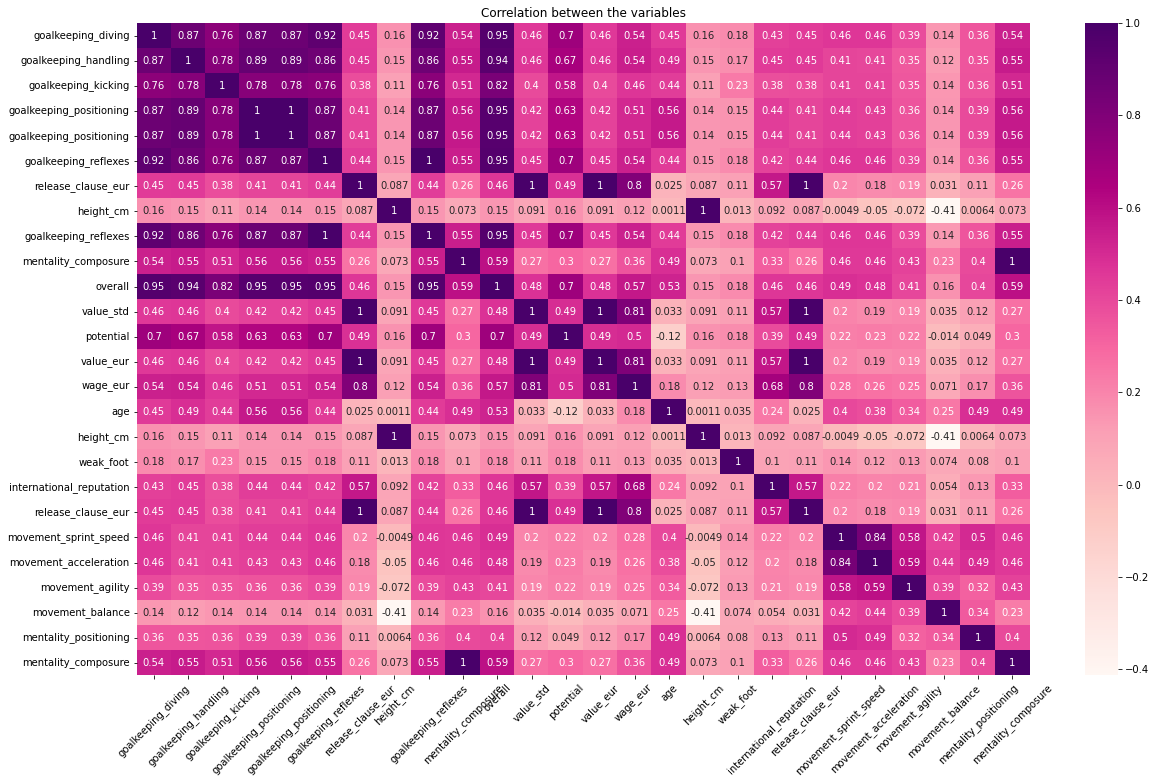

In [ ]:
#heatmap for different features
fig, ax = plt.subplots(figsize=(20,12))         # Sample figsize in inches
sns.heatmap(goalkeeper_df.corr(), annot = True, ax=ax, cmap="RdPu");
plt.title('Correlation between the variables')
plt.xticks(rotation=45);

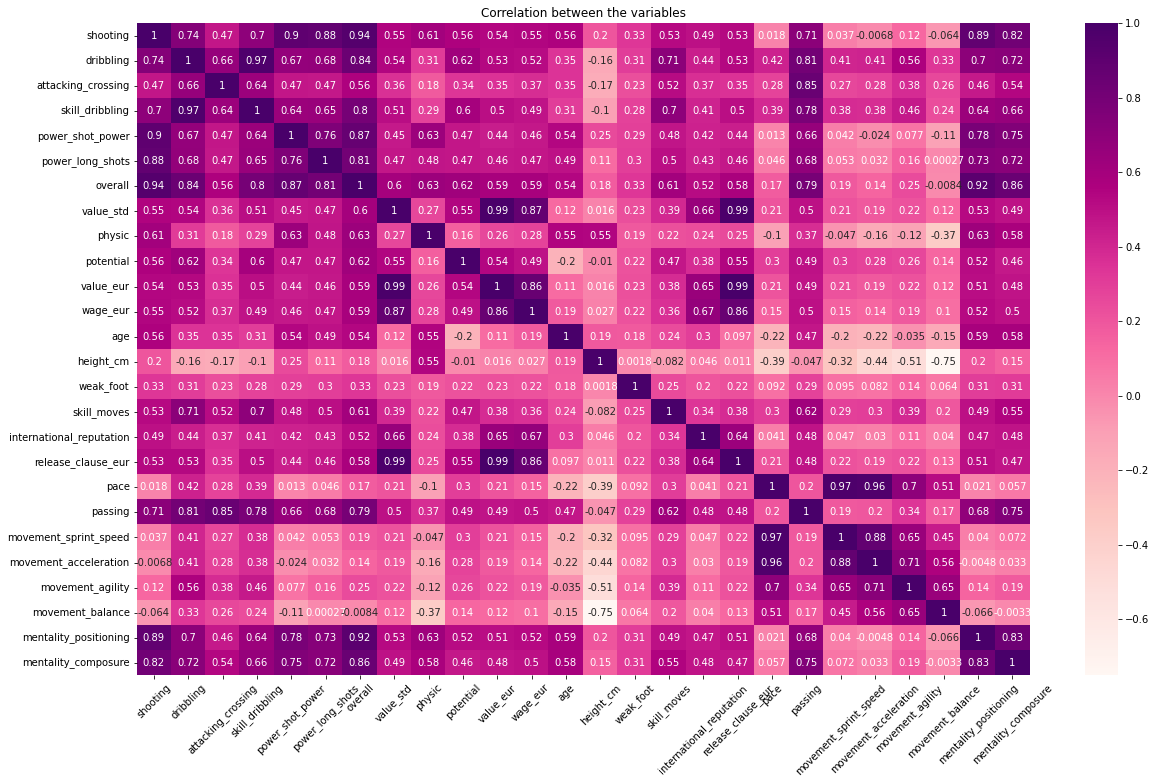

In [ ]:
#heatmap for different features
fig, ax = plt.subplots(figsize=(20,12))         # Sample figsize in inches
sns.heatmap(forward_df.corr(), annot = True, ax=ax, cmap="RdPu");
plt.title('Correlation between the variables')
plt.xticks(rotation=45);

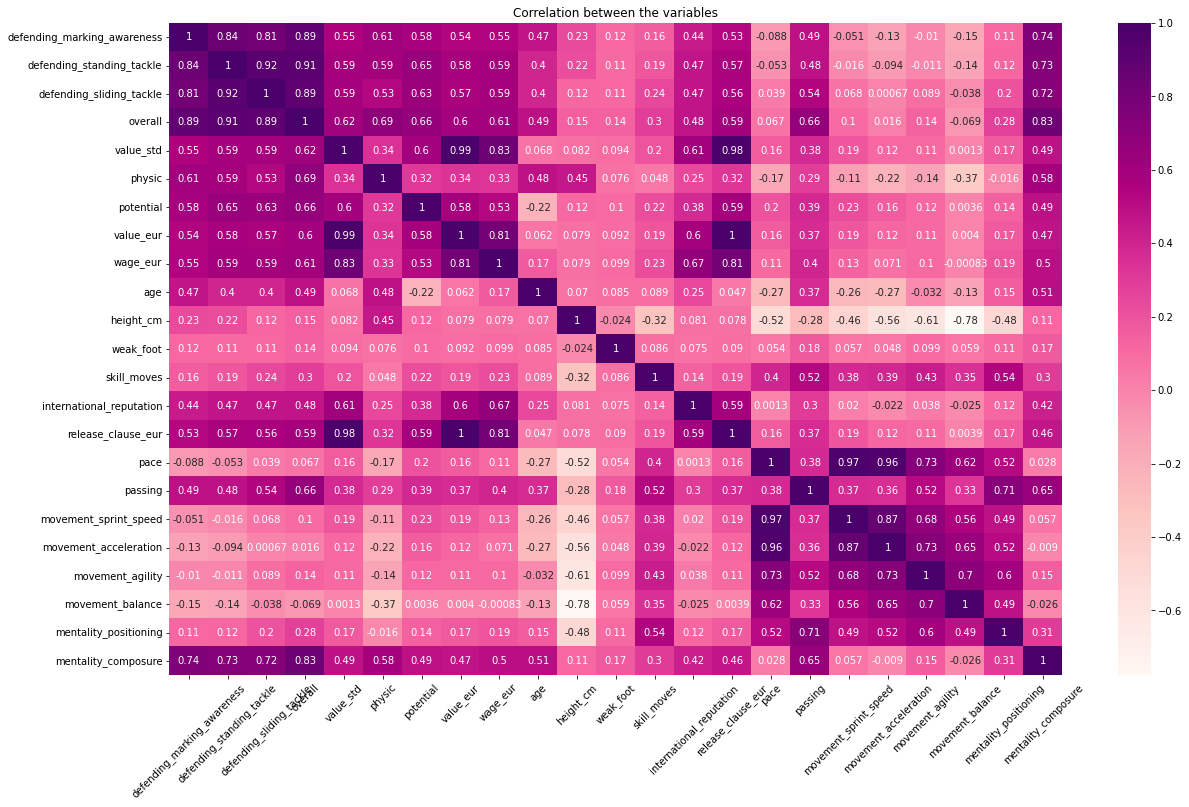

In [ ]:
#heatmap for different features
fig, ax = plt.subplots(figsize=(20,12))         # Sample figsize in inches
sns.heatmap(defenders_df.corr(), annot = True, ax=ax, cmap="RdPu");
plt.title('Correlation between the variables')
plt.xticks(rotation=45);

Now...we have 4 datasets for each position and that will help the model predict the market value with much accuracy

# **Now it's time for Models:**




## **Modeling for the Sport Roles based Datasets:**

###  **Linear Regression Models:**

In [ ]:
Linear_model_def = LinearRegression()

Linear_model_for = LinearRegression()
Linear_model_mid = LinearRegression()
Linear_model_gk = LinearRegression()

In [ ]:
dropped_columns_model = ['value_eur','value_std',
'release_clause_eur','wage_eur']#,'height_cm','weak_foot']





forward_target = forward_df['value_std']

forward_train = forward_df.drop(dropped_columns_model,axis=1)



defender_target = defenders_df['value_std']

defender_train = defenders_df.drop(dropped_columns_model,axis=1)
#defender_train = defenders_df['overall']


midfield_target = midfield_df['value_std']
midfield_train =  midfield_df.drop(dropped_columns_model,axis=1)

goalkeeper_target = goalkeeper_df['value_std']
goalkeeper_train = goalkeeper_df.drop(['value_eur','release_clause_eur','value_std'],axis=1) #'height_cm'],axis=1)

print(forward_train.shape)
print(defender_train.shape) 
print(goalkeeper_train.shape)
print(midfield_train.shape)


(5422, 22)
(10689, 19)
(2043, 22)
(5177, 16)


**Defenders Model:**

In [ ]:
def_train, def_test, def_tar_train, def_tar_test = train_test_split( 
 defender_train,defender_target , test_size=0.30, random_state=42)
# x_train -> def_train    x_test-> def_test    y_train-> def_tar_train  y_test -> def_tar_test
Linear_model_def.fit(def_train,def_tar_train)
def_train_predict = Linear_model_def.predict(def_train)
def_test_predict = Linear_model_def.predict(def_test)

In [ ]:


r2_train = r2_score(def_tar_train,def_train_predict)
r2_test = r2_score(def_tar_test,def_test_predict)

print(r2_train,r2_test)

0.5891900880259942 0.5938710350886391


**Forward Model:**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
 forward_train,forward_target , test_size=0.33, random_state=42)
Linear_model_for.fit(X_train,y_train)
y_train_predict = Linear_model_for.predict(X_train)
y_test_predict = Linear_model_for.predict(X_test)

In [ ]:
r2_train = r2_score(y_train,y_train_predict)
r2_test = r2_score(y_test,y_test_predict)

print(r2_train,r2_test)

0.6224852692423244 0.5451913204813117


In [ ]:
Linear_model_for.score(X_test,y_test)

0.5451913204813117

**Mid-Field Model:**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
 midfield_train,midfield_target , test_size=0.33, random_state=42)
Linear_model_mid.fit(X_train,y_train)
y_train_predict = Linear_model_mid.predict(X_train)
y_test_predict = Linear_model_mid.predict(X_test)

In [ ]:
r2_train = r2_score(y_train,y_train_predict)
r2_test = r2_score(y_test,y_test_predict)

print(r2_train,r2_test)

0.5946176159410247 0.6294765781082068


**Goal-Keepers Model:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
 goalkeeper_train,goalkeeper_target , test_size=0.33, random_state=42)
Linear_model_gk.fit(X_train,y_train)
y_train_predict = Linear_model_gk.predict(X_train)
y_test_predict = Linear_model_gk.predict(X_test)

In [ ]:
r2_train = r2_score(y_train,y_train_predict)
r2_test = r2_score(y_test,y_test_predict)

print(r2_train,r2_test)

0.6657808687251268 0.7193588982107934


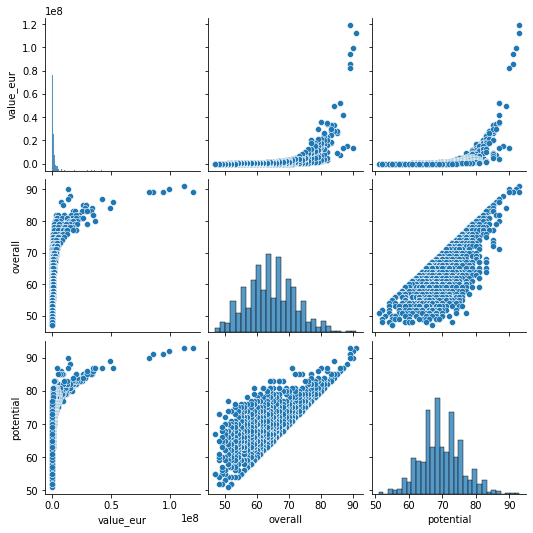

In [ ]:
sns.pairplot(goalkeeper_df[['value_eur','overall','potential']])

### **Regularization:**


> Using Ridge Regression in order to reduce its generalization/test error.



**Mid-Field Ridge Model:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
 midfield_train,midfield_target , test_size=0.33, random_state=42)
Ridge_Model_Mid = Ridge()
Ridge_Model_Mid.fit(X_train,y_train)
y_train_predict = Ridge_Model_Mid.predict(X_train)
y_test_predict = Ridge_Model_Mid.predict(X_test)

In [ ]:
r2_train = r2_score(y_train,y_train_predict)
r2_test = r2_score(y_test,y_test_predict)

print(r2_train,r2_test)

0.5946142186066836 0.6296587969537274


### **Multiple Linear Regression:**



> **Mid-Field Poly-Linear Model**



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
 midfield_train,midfield_target , test_size=0.33, random_state=42)
poly_feat = PolynomialFeatures(degree =2)
X_train_poly = poly_feat.fit_transform (X_train)
poly_model_Mid = LinearRegression()
poly_model_Mid.fit(X_train_poly, y_train)
X_test_poly = poly_feat.transform(X_test)
y_train_poly_predict = poly_model_Mid.predict(X_train_poly)
y_test_poly_predict = poly_model_Mid.predict(X_test_poly)


In [ ]:
r2_poly_train = r2_score(y_train,y_train_poly_predict)
r2_poly_test = r2_score(y_test,y_test_poly_predict)
print(r2_poly_train,r2_poly_test)

0.9145016761249768 0.8803893244600541




> **Defender Poly-Linear Model**



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
 defender_train,defender_target , test_size=0.33, random_state=42)
poly_feat = PolynomialFeatures(degree =2)
X_train_poly = poly_feat.fit_transform (X_train)
poly_model_Def = LinearRegression()
poly_model_Def.fit(X_train_poly, y_train)
X_test_poly = poly_feat.transform(X_test)
y_train_poly_predict = poly_model_Def.predict(X_train_poly)
y_test_poly_predict = poly_model_Def.predict(X_test_poly)

In [ ]:
r2_poly_train = r2_score(y_train,y_train_poly_predict)
r2_poly_test = r2_score(y_test,y_test_poly_predict)
print(r2_poly_train,r2_poly_test)

0.909514231635234 0.8987508149115737




> **Forward Poly-Linear Model**



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
 forward_train,forward_target , test_size=0.33, random_state=42)
poly_feat = PolynomialFeatures(degree =2)
X_train_poly = poly_feat.fit_transform (X_train)
poly_model_For = LinearRegression()
poly_model_For.fit(X_train_poly, y_train)
X_test_poly = poly_feat.transform(X_test)
y_train_poly_predict = poly_model_For.predict(X_train_poly)
y_test_poly_predict = poly_model_For.predict(X_test_poly)

In [ ]:
r2_poly_train = r2_score(y_train,y_train_poly_predict)
r2_poly_test = r2_score(y_test,y_test_poly_predict)
print(r2_poly_train,r2_poly_test)

0.9480698972106966 0.9069452973531178





> **GoaKeeper Poly-Linear Model:**





In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
 goalkeeper_train,goalkeeper_target , test_size=0.33, random_state=42)
poly_feat = PolynomialFeatures(degree =2)
X_train_poly = poly_feat.fit_transform (X_train)
poly_model_GK = LinearRegression()
poly_model_GK.fit(X_train_poly, y_train)
X_test_poly = poly_feat.transform(X_test)
y_train_poly_predict = poly_model_GK.predict(X_train_poly)
y_test_poly_predict = poly_model_GK.predict(X_test_poly)

In [ ]:
r2_poly_train = r2_score(y_train,y_train_poly_predict)
r2_poly_test = r2_score(y_test,y_test_poly_predict)
print(r2_poly_train,r2_poly_test)

0.9696607859596086 0.8605355854449404


### **SVR Model:**



> **GoalKeeper SVR Model:**





In [ ]:
from sklearn.svm import SVR
X_train, X_test, y_train, y_test = train_test_split(
 goalkeeper_train,goalkeeper_target , test_size=0.33, random_state=42)
SupportVectorReg=SVR()
SupportVectorReg.fit(X_train,y_train)
y_pred_SVR_train=SupportVectorReg.predict(X_train)
y_pred_SVR_test=SupportVectorReg.predict(X_test)



In [ ]:
r2_svr_train = r2_score(y_train,y_pred_SVR_train)
r2_svr_test = r2_score(y_test,y_pred_SVR_test)
print(r2_poly_train,r2_poly_test)

0.9696607859596086 0.8605355854449404


### **Nearest Neighbour Regression Model:**

In [ ]:
rmse_val = []
X_train, X_test, y_train, y_test = train_test_split(
 forward_train,forward_target , test_size=0.33, random_state=42)
for k in range(20):
    k = k+1
    neighbour_model_for = neighbors.KNeighborsRegressor(n_neighbors = k)
    neighbour_model_for.fit(X_train, y_train) 
    y_test_predict=neighbour_model_for.predict(X_test)
    y_train_predict=neighbour_model_for.predict(X_train)
    error = sqrt(mean_squared_error(y_test,y_test_predict))
    rmse_val.append(error) 
    print('RMSE value for k= ' , k , 'is:', error)

RMSE value for k=  1 is: 0.40385422005493504
RMSE value for k=  2 is: 0.35067648952578767
RMSE value for k=  3 is: 0.3404911967129139
RMSE value for k=  4 is: 0.345316189122085
RMSE value for k=  5 is: 0.3460344337758975
RMSE value for k=  6 is: 0.3531895274666374
RMSE value for k=  7 is: 0.3576220295796979
RMSE value for k=  8 is: 0.36855623665231235
RMSE value for k=  9 is: 0.3545767549796022
RMSE value for k=  10 is: 0.35963317655704824
RMSE value for k=  11 is: 0.37168426906392493
RMSE value for k=  12 is: 0.37674370241957567
RMSE value for k=  13 is: 0.38357393055565014
RMSE value for k=  14 is: 0.38810477590566944
RMSE value for k=  15 is: 0.39209914135395607
RMSE value for k=  16 is: 0.40201631313507397
RMSE value for k=  17 is: 0.4077927756207536
RMSE value for k=  18 is: 0.4157273773359966
RMSE value for k=  19 is: 0.4234555303730013
RMSE value for k=  20 is: 0.4255559754690022


In [ ]:
min_value= min(rmse_val)
min_index = rmse_val.index(min_value)
print(min_index)
print(min_value)
k= min_index

2
0.3404911967129139


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(forward_train,forward_target , test_size=0.33, random_state=42)
neighbour_model_for = neighbors.KNeighborsRegressor(n_neighbors = k)
neighbour_model_for.fit(X_train, y_train) 
y_test_predict=neighbour_model_for.predict(X_test)
y_train_predict=neighbour_model_for.predict(X_train)
error = sqrt(mean_squared_error(y_test,y_test_predict))
print('RMSE value for k= ' , k , 'is:', error)

RMSE value for k=  2 is: 0.35067648952578767


In [ ]:
r2_train = r2_score(y_train,y_train_predict)
r2_test = r2_score(y_test,y_test_predict)
print("R2 Scores:")
print(r2_train,r2_test)

R2 Scores:
0.9559122645648144 0.887996527111625


## **Modeling the Full players Dataset:**


In [ ]:
players_df= df22
players_df=pd.concat([players_df,df20])
players_df=pd.concat([players_df,df19])
players_df.drop_duplicates()
players_df.dropna(subset=['release_clause_eur'],inplace=True)
players_df.dropna(subset=['value_eur'],inplace=True)
players_df.shape

(52074, 91)

In [ ]:
players_df['value_std']=standardization(players_df.value_eur)
players_df.isnull().sum()

sofifa_id           0
player_positions    0
overall             0
potential           0
value_eur           0
                   ..
cb                  0
rcb                 0
rb                  0
gk                  0
value_std           0
Length: 91, dtype: int64

In [ ]:
dropped_columns_model = ['value_std','value_eur','release_clause_eur','wage_eur','sofifa_id','club_position','player_tags','player_traits','shooting','passing','pace',
                         'defending','dribbling','work_rate','physic',
                         'player_positions','club_name','league_name','league_level','nation_position','preferred_foot','skill_moves'
                         ,'gk','goalkeeping_positioning','goalkeeping_speed','ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm'
                        , 'cm','club_name','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb']
                         #,goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_speed','height_cm','goalkeeping_reflexes','mentality_composure']
                         
players_train = players_df.drop(dropped_columns_model,axis=1)
players_df.drop_duplicates()
players_target = players_df['value_std']
print(players_train.shape)
print(players_target.shape)

#list(players_train)


(52074, 40)
(52074,)


###  **Linear Regression Model:**

In [ ]:
Linear_model_players = LinearRegression()
players_train_model, players_test_model, players_tar_train, players_tar_test = train_test_split( players_train,players_target , test_size=0.30, random_state=42)
Linear_model_players.fit(players_train_model,players_tar_train)
players_train_predict = Linear_model_players.predict(players_train_model)
players_test_predict = Linear_model_players.predict(players_test_model)


In [ ]:
r2_train = r2_score(players_tar_train,players_train_predict)
r2_test = r2_score(players_tar_test,players_test_predict)
print("R2 Scores:")
print(r2_train,r2_test)
print("RMSE score:",np.sqrt(mean_squared_error(players_tar_test,players_test_predict)))

R2 Scores:
0.5787037620115696 0.5562329596271076
RMSE score: 0.6472003503498583


### **Nearest Neighbour Regression:**

In [ ]:
rmse_val = []
players_train_model, players_test_model, players_tar_train, players_tar_test = train_test_split( players_train,players_target , test_size=0.30, random_state=42)
for k in range(20):
    k = k+1
    neighbour_model = neighbors.KNeighborsRegressor(n_neighbors = k)
    neighbour_model.fit(players_train_model, players_tar_train) 
    players_test_predict=neighbour_model.predict(players_test_model)
    players_train_predict=neighbour_model.predict(players_train_model)
    error = sqrt(mean_squared_error(players_tar_test,players_test_predict))
    rmse_val.append(error) 
    print('RMSE value for k= ' , k , 'is:', error)

RMSE value for k=  1 is: 0.5025422773735033
RMSE value for k=  2 is: 0.4429583670927765
RMSE value for k=  3 is: 0.4111246980963155
RMSE value for k=  4 is: 0.40621826263559896
RMSE value for k=  5 is: 0.40886538949063433
RMSE value for k=  6 is: 0.4063772031853309
RMSE value for k=  7 is: 0.4099191289774289
RMSE value for k=  8 is: 0.4112144073976239
RMSE value for k=  9 is: 0.4125273065186391
RMSE value for k=  10 is: 0.41648418679261195
RMSE value for k=  11 is: 0.42019569130104767
RMSE value for k=  12 is: 0.42157832974059906
RMSE value for k=  13 is: 0.4256924350738745
RMSE value for k=  14 is: 0.42931346671128146
RMSE value for k=  15 is: 0.43326874940046467
RMSE value for k=  16 is: 0.43550984688887884
RMSE value for k=  17 is: 0.4371994295772134
RMSE value for k=  18 is: 0.4385851779576704
RMSE value for k=  19 is: 0.4410886527672425
RMSE value for k=  20 is: 0.4438742604957556


In [ ]:
min_value= min(rmse_val)
min_index = rmse_val.index(min_value)
print(min_index)
print(min_value)
k= min_index

3
0.40621826263559896


In [ ]:

players_train_model, players_test_model, players_tar_train, players_tar_test = train_test_split( players_train,players_target , test_size=0.30, random_state=42)
neighbour_model = neighbors.KNeighborsRegressor(n_neighbors = k)
neighbour_model.fit(players_train_model, players_tar_train) 
players_test_predict=neighbour_model.predict(players_test_model)
players_train_predict=neighbour_model.predict(players_train_model)
error = sqrt(mean_squared_error(players_tar_test,players_test_predict))
 
print('RMSE value for k= ' , k , 'is:', error)

RMSE value for k=  3 is: 0.4111246980963155


In [ ]:
r2_train = r2_score(players_tar_train,players_train_predict)
r2_test = r2_score(players_tar_test,players_test_predict)
print("R2 Scores:")
print(r2_train,r2_test)

R2 Scores:
0.9070902344623339 0.820929234252198


### **Random Forest Regressor:**

In [ ]:
players_train_model, players_test_model, players_tar_train, players_tar_test = train_test_split( players_train,players_target , test_size=0.30, random_state=42)

pt = PowerTransformer()
X_train_transformed = pt.fit_transform(players_train_model)
X_test_transformed = pt.transform(players_test_model)
rs= RobustScaler()
X_train_scaled = rs.fit_transform(X_train_transformed)
X_test_scaled = rs.transform(X_test_transformed)
rf_players = RandomForestRegressor()
rf_players.fit(X_train_scaled,players_tar_train);


In [ ]:
players_test_predict=rf_players.predict(X_test_scaled)
players_train_predict=rf_players.predict(X_train_scaled)
error = sqrt(mean_squared_error(players_tar_test,players_test_predict))

In [ ]:
r2_train = r2_score(players_tar_train,players_train_predict)
r2_test = r2_score(players_tar_test,players_test_predict)
print("R2 Scores:")
print(r2_train,r2_test)
print("RMSE score:",error)

R2 Scores:
0.9911986960401288 0.9203718268497004
RMSE score: 0.274154007257671
